#  Programming for Data Analysis Project 2 - An analysis of paleo-present climate data

Author: Audrey Allen

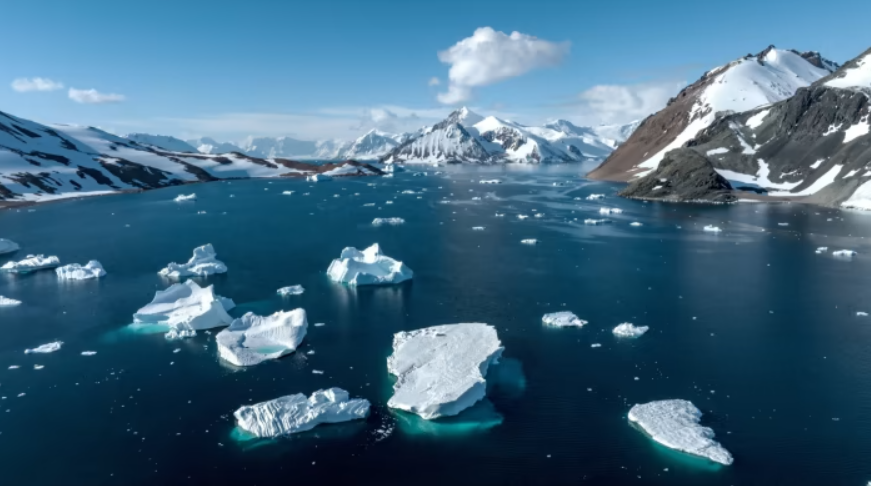


- Analyse CO2 vs Temperature Anomaly from 800kyrs – present

- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

- Examine Irish context:

- Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)


### Roughwork


** Below I will firstly do my Roughwork for the temperature file.**

In [185]:
# Delete top number of rows from .txt file  and convert to .csv file

import pandas as pd


columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature']

data = pd.read_csv('Roughwork_Temperature/NOAATemperature.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python')

display(data)

df = data[['Age', 'Temperature']]

df.to_csv (r'Roughwork_Temperature/NOAATemperature.csv', index=None)


,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [186]:
# Read in Excel File - Temperature Data

#Calculate Average Temperature anomoly over the years

# Firstly extract two columns from Jousel dataset into a dataframe

# Also rename the age field


import pandas as pd
df = pd.read_excel('Roughwork_Temperature/Temperature Data - Jousel.xls')

display(df)

df1 = df.rename(columns=({'EDC3béta':'Age'}))

df2 = df1[['Age', 'temp']]

df2.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)



,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


Calculate the temperature anomoly from the 800K years ago to now. Jouzels data only goes as far as the year 2000 so I sourced data from 2000 to 2022 from https://en.tutiempo.net/climate/ws-898280.html. This is temperature data from Dome C II in Antartica so from the same location as Jouzels data. 

However the average data per year is in degree celcius and there seems to be quite a significant difference when comparing Jouzels data and this dataset. This difference will be noticable from the year 2001 onwards. (After Jouzels data)

There is not average data for every year in this new Dome C dataset. I convert the average yearly temperature for Dome C from celcius to Kelvin as this is what Jouzel has measured his average temperature as.

In [187]:
# Import DictWriter class from CSV module
import csv
 
# list of column names
field_names = ['Age', 'Temp']
 
# Below are the years and the values taken from Dome C II - Converted from celcius to Degrees Kelvin from intermittent years from 
# 2001 to 2022

values = [[-51,222.25],[-53,221.25],[-54,222.75],[-60,220.55],[-61,222.95],[-62,221.35],[-63,222.25],[-64,222.25],[-67,221.85], [-68,222.05],[-69,222.95],[-70,222.85],[-72,223.25]] 
     

with open('Roughwork_Temperature/TemperatureAnomoly.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)

In [188]:
# Want to sort the temperature data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_Temperature/TemperatureAnomoly.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["Age"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 


Before sorting:
           Age    temp
0    -50.00000  218.30
1    -43.55977  218.30
2    -37.44019  218.30
3    -31.64156  218.30
4    -24.55278  218.30
...        ...     ...
5827 -67.00000  221.85
5828 -68.00000  222.05
5829 -69.00000  222.95
5830 -70.00000  222.85
5831 -72.00000  223.25

[5832 rows x 2 columns]

After sorting:
           Age    temp
5831     -72.0  223.25
5830     -70.0  222.85
5829     -69.0  222.95
5828     -68.0  222.05
5827     -67.0  221.85
...        ...     ...
5814  816871.6  211.00
5815  817693.6  211.20
5816  818505.5  211.30
5817  819303.1  211.40
5818  820093.9  211.40

[5832 rows x 2 columns]


In [189]:
# And then I want to write to a the csv file again but this time the data will be sorted.

df = csvData

df.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)

In [190]:
# The next piece of work is to get the temperature anomoly from 800K years to 2022
# I calculated the average temperature from  age -50 (2000) to 1000 approx 1000 years prior to that (989.8635)
# I then subtracted the average temperature for that period from the average temperature for that year (in kelvin)
# and that was the anomoly for that year
# As I mentioned above the anomoly is larger after 2001 as I have amalgamated two different datasets and even though it is for the 
# same location 'Antartica' there are noticable differences in temperature and therefore the anomoly looks larger after 2001.
# Just something to note - N.B. N.B.

from statistics import mean 

inp_lst = [218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	219.2,	220.4,	217.7,	217,	217.4,	217.4,	216.9,	218.2,	216.8,	216.3,	217.8,	217,	218.4,	217.7,	216.7,	216.2,	217.9,	215,	217.8,	218.2,	218.1,	217.4,	217.3,	216,	217.1,	217.6,	216.2,	217,	216.8,	217.4,	216.7,	216.5,	215.9,	216.9,	217.3,	217.6,	215.7,	217.6,	217.5,	216.8,	216.6,	217.8,	215,	216.5,	217,	218.7,	218.1,	216.6,	218.8,	216.5,	216.6,	218.9,	218.4,	217.7,	216.4,	216.8,	216.8,	216.9,	216.4,	216,	216.5,	217.3,	217.2,	217.7,	217.4,	218,	218.3,	218.6,	218.9,	216.4,	218,	216,	218.3,	216.4,	216.7,	216.9,	216.7,	217.8,	217,
] 
list_avg = mean(inp_lst) 

print("Average value of the list:\n") 
print(list_avg) 
print("Average value of the list with precision upto 3 decimal value:\n")
print(round(list_avg,3))




Average value of the list:

217.39021739130436
Average value of the list with precision upto 3 decimal value:

217.39


In [191]:
# Now that I have got the average over 1000 years I need to subtract that value which is 217.39 from all of the average kelvin values 
# in Jouzels data and also my amalgamated data from Dome C - this will give me the temperature anomoly over this period.

# Again it is important to note there is a change when I amalgamate Jouzels dataset with the 
# Antartic Dome C dataset from 2001 onwards

df['Anomoly'] = df['temp']-217.39

df['Anomoly'] = df['Anomoly'].round(2)

display(df)

,Age,temp,Anomoly
5831,-72.0,223.25,5.86
5830,-70.0,222.85,5.46
5829,-69.0,222.95,5.56
5828,-68.0,222.05,4.66
5827,-67.0,221.85,4.46
...,...,...,...
5814,816871.6,211.00,-6.39
5815,817693.6,211.20,-6.19
5816,818505.5,211.30,-6.09
5817,819303.1,211.40,-5.99


In [192]:
# And then I want to write to a the csv file again but this time it will have the additional column for anomoly

df = csvData

df.drop('temp', inplace=True, axis=1) 

df = df.rename(columns=({'Age':'Year'}))

df.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)


In [193]:
# The TemperatureAnomoly file is now ready to be plotted so I will copy into my Final Data folder

import shutil

source = r"Roughwork_Temperature/TemperatureAnomoly.csv"
target = r"FinalData/TemperatureAnomoly.csv"

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/

'FinalData/TemperatureAnomoly.csv'

** Now I will complete my Roughwork_Temperature for the CO2 Data **

In [194]:
# Read in Excel File and convert to csv- CO2 Data

import pandas as pd
import csv

# The data in this excel file is a review of an earlier file to correct an error that was made

# The data includes data from 800K years ago to 2001. I have sourced data from Mauna Loa which will cover the period from 2001
# to 2022

# I want to convert the excel file to csv format as it will be the same as the other files in the project and it is easier to view
# and use

  
# Read and store content 
# of an excel file  

import pandas as pd
df = pd.read_excel ('Roughwork_CO2/CO2 Data IPCC Report.xls', sheet_name='CO2 Composite', skiprows=range(14)) 


df.drop('sigma mean CO2 (ppmv)', inplace=True, axis=1) 
df.drop('Location', inplace=True, axis=1) 
df['Year'] = df['Year'].round(2)
df['CO2'] = df['CO2'].round(2)


display(df)


df.to_csv (r'Roughwork_CO2/CO2 Data IPCC Report.csv', index=None, header=True)

# show the dataframe 

df


# Reference: https://www.geeksforgeeks.org/convert-excel-to-csv-in-python/

,Year,CO2
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65
3,-44.41,357.11
4,-43.08,353.95
...,...,...
1896,803925.28,202.92
1897,804009.87,207.50
1898,804522.67,204.86
1899,805132.44,202.23


,Year,CO2
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65
3,-44.41,357.11
4,-43.08,353.95
...,...,...
1896,803925.28,202.92
1897,804009.87,207.50
1898,804522.67,204.86
1899,805132.44,202.23


In [195]:
# Now I want to add in the Mauna Loa data into the .csv file

# Import DictWriter class from CSV module

import csv

 
# Below are the years and the CO2 values taken from Mauna Loa - from 2002 to 2022

values = [[-52,373.22],[-53,375.77],[-54,377.49],[-55,379.8],[-56,381.9],[-57,383.76],[-58,385.59],[-59,387.37],[-60,389.85], [-61,391.63],[-62,393.82],[-63,396.48],[-64,398.61],[-65,400.83],[-66,404.41],[-68,408.72],[-69,411.65] ,[-70,414.21],[-71,416.41] ,[-72,418.53]] 


with open('Roughwork_CO2/CO2 Data IPCC Report.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)



In [196]:
# Want to sort the Co2 data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_CO2/CO2 Data IPCC Report.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["Year"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 


Before sorting:
       Year     CO2
0    -51.03  368.02
1    -48.00  361.78
2    -46.28  359.65
3    -44.41  357.11
4    -43.08  353.95
...     ...     ...
1916 -68.00  408.72
1917 -69.00  411.65
1918 -70.00  414.21
1919 -71.00  416.41
1920 -72.00  418.53

[1921 rows x 2 columns]

After sorting:
           Year     CO2
1920     -72.00  418.53
1919     -71.00  416.41
1918     -70.00  414.21
1917     -69.00  411.65
1916     -68.00  408.72
...         ...     ...
1896  803925.28  202.92
1897  804009.87  207.50
1898  804522.67  204.86
1899  805132.44  202.23
1900  805668.87  207.29

[1921 rows x 2 columns]


In [197]:
# And then I want to write to a the csv file again but this time the data will be sorted.

df = csvData

df.to_csv (r'Roughwork_CO2/CO2 Data IPCC Report.csv', index=None)

In [198]:
# The CO2 file is now ready to be plotted so I will copy into my Final Data folder

import shutil

source = r"Roughwork_CO2/CO2 Data IPCC Report.csv"
target = r"FinalData/CO2 Data IPCC Report.csv"

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/


'FinalData/CO2 Data IPCC Report.csv'

### Analyse CO2 vs Temperature Anomaly from 800kyrs – present

Overview of the Datasets


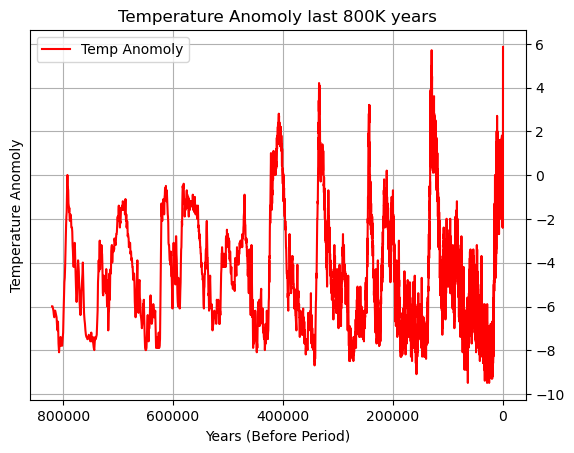

In [199]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to firstly plot the temperature data

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

TemperatureData  = pd.read_csv('FinalData/TemperatureAnomoly.csv')

fig, ax = plt.subplots()

# I also want to invert the x-axis

# Years (BP) - Where period is 1950
TemperatureData.plot(x="Year", y="Anomoly", ax=ax, label='Temp Anomoly',color='red')


# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("Temperature Anomoly")
plt.grid(True)
plt.savefig('Images/Temperature Anomoly.png') # Save to PNG file
plt.show()





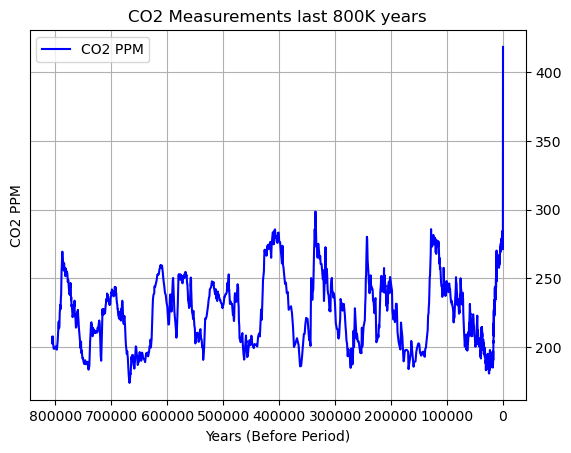

In [200]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to firstly plot the CO2 data

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

CO2Data  = pd.read_csv('FinalData/CO2 Data IPCC Report.csv')

fig, ax = plt.subplots()




# I also want to invert the x-axis

# Years (BP) - Where period is 1950

CO2Data.plot(x="Year", y="CO2", ax=ax, label='CO2 PPM',color='blue')

# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("CO2 Measurements last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CO2 PPM")
plt.grid(True)
plt.savefig('Images/CO2.png') # Save to PNG file
plt.show()


                Year      Anomoly
count    5832.000000  5832.000000
mean   191373.269057    -3.895838
std    193444.737289     3.153729
min       -72.000000    -9.490000
25%     47144.965000    -6.490000
50%    123172.800000    -4.490000
75%    276096.950000    -1.390000
max    820093.900000     5.860000
                Year          CO2
count    1921.000000  1921.000000
mean   240281.670286   237.221411
std    273941.086417    39.216980
min       -72.000000   173.710000
25%     14354.480000   205.100000
50%     70427.260000   232.920000
75%    500304.780000   259.400000
max    805668.870000   418.530000


<Axes: title={'center': 'CO2 Measurements and Temperature Anomoly last 800K years'}, xlabel='Year', ylabel='CO2 PPM'>

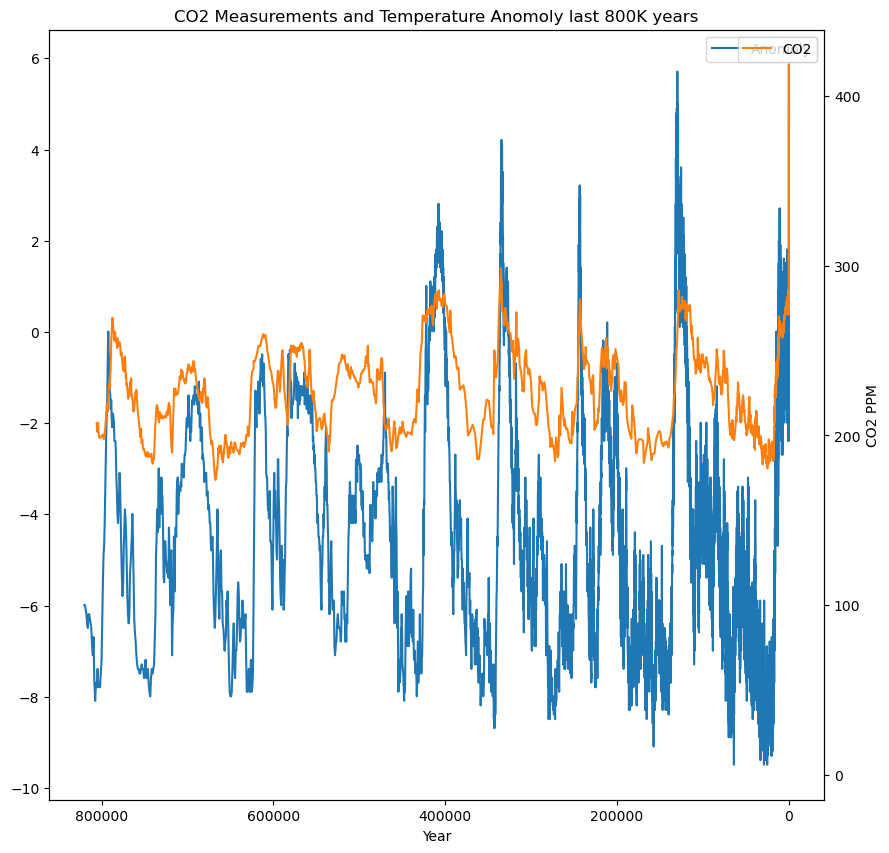

In [201]:
# Plot both temperature and CO2 on the same plot

import matplotlib.pyplot as plt
# Data points of line 1


CO2 = pd.read_csv('FinalData/CO2 Data IPCC Report.csv', header = 0, index_col = 0,
                         parse_dates=True)
Temp = pd.read_csv('FinalData/TemperatureAnomoly.csv', header = 0, index_col = 0,
                       parse_dates=True)

# plot both overlayed
# I also want to invert the x-axis


SummaryTemp = TemperatureData.describe()

print (SummaryTemp) # To get min and max temperature - As I am amalgamating the data from 2000 onwards there is a larger spike or 
# anomoly than expected but the trend is similar to other graphs online in regards to CO2 and temperature. 

SummaryCO2 = CO2Data.describe()

print (SummaryCO2)

ax = Temp.plot(figsize=(10,10))
ax3 = ax.twinx()  
ax3.plot(-9.49,5.86)   # Get minimum and maximum temperature anomoly  - Ranges from -9.49 - 5.86  
ax.invert_xaxis()
plt.title("CO2 Measurements and Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CO2 PPM")
plt.grid(True)
plt.savefig('Images/CO2andTemp.png') # Save to PNG file
#ax3.yaxis.tick_right() 
CO2.plot(ax=ax3)



In [210]:
# I am going to analyse the difference between NOAA's temperature anomoly over the past 800K years and my calculated temperature 
# anomoly

JouzelAnomoly = pd.read_csv('Roughwork_Temperature/NOAATemperature.csv', header = 0)



JouzelAnomoly = JouzelAnomoly.describe()

print(JouzelAnomoly)

print(SummaryTemp)



                 Age  Temperature
count    5800.000000  5785.000000
mean   190016.390617    -4.580228
std    192546.207239     3.446971
min       -50.000000   -10.580000
25%     46330.569350    -7.450000
50%    121793.340000    -5.200000
75%    272456.740000    -1.820000
max    801662.000000     5.460000
                Year      Anomoly
count    5832.000000  5832.000000
mean   191373.269057    -3.895838
std    193444.737289     3.153729
min       -72.000000    -9.490000
25%     47144.965000    -6.490000
50%    123172.800000    -4.490000
75%    276096.950000    -1.390000
max    820093.900000     5.860000


# Analysis - 

Th overall analysis of the CO2 and temperature data shows us that the levels of CO2 have been rising consistently over the past 800K years and in conjunction with that the temperature has also been on the rise. There have been 5 or 6 major ice ages since the earths 4.5 billion year history. The dips in the blue line above show us these dips in temperature anomoly. The temperature anomoly is the difference between the temperature over a given period (In this case 1000 years) and then subtracted from the actual average temperature for that particular year.

Analysing the summary data from the NOAA anomoly record and my temperature anomoly record there are differences beween the mean, standard deviation, minimum, maximum, 25%, 50% and 75% but they are not huge. I have more records in my datafile as I amalgamated data from Dome C in Antartica to retrieve the data from 2001 onwards. As I have mentioned previously this data seems to be quite different from Jouzels temperature data. From the year 2000 to 2001 there is a increase in temperature anomoly from 0.91 to 4.86 which is a difference of 3.95. The data seems skewed here so caution is to be advised when using this for analytic purposes. 







